In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'DeepDTA-master/data'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../
%cd data

Mounted at /content/drive
/content/drive/My Drive
/content
/content/data


In [2]:
%ls

davis/  kiba/  README.md


In [2]:
CHARPROTSET = { "A": 1, "C": 2, "B": 3, "E": 4, "D": 5, "G": 6, 
				"F": 7, "I": 8, "H": 9, "K": 10, "M": 11, "L": 12, 
				"O": 13, "N": 14, "Q": 15, "P": 16, "S": 17, "R": 18, 
				"U": 19, "T": 20, "W": 21, 
				"V": 22, "Y": 23, "X": 24, 
				"Z": 25 }

CHARPROTLEN = 25

CHARCANSMISET = { "#": 1, "%": 2, ")": 3, "(": 4, "+": 5, "-": 6, 
			 ".": 7, "1": 8, "0": 9, "3": 10, "2": 11, "5": 12, 
			 "4": 13, "7": 14, "6": 15, "9": 16, "8": 17, "=": 18, 
			 "A": 19, "C": 20, "B": 21, "E": 22, "D": 23, "G": 24,
			 "F": 25, "I": 26, "H": 27, "K": 28, "M": 29, "L": 30, 
			 "O": 31, "N": 32, "P": 33, "S": 34, "R": 35, "U": 36, 
			 "T": 37, "W": 38, "V": 39, "Y": 40, "[": 41, "Z": 42, 
			 "]": 43, "_": 44, "a": 45, "c": 46, "b": 47, "e": 48, 
			 "d": 49, "g": 50, "f": 51, "i": 52, "h": 53, "m": 54, 
			 "l": 55, "o": 56, "n": 57, "s": 58, "r": 59, "u": 60,
			 "t": 61, "y": 62}

CHARCANSMILEN = 62

CHARISOSMISET = {"#": 29, "%": 30, ")": 31, "(": 1, "+": 32, "-": 33, "/": 34, ".": 2, 
				"1": 35, "0": 3, "3": 36, "2": 4, "5": 37, "4": 5, "7": 38, "6": 6, 
				"9": 39, "8": 7, "=": 40, "A": 41, "@": 8, "C": 42, "B": 9, "E": 43, 
				"D": 10, "G": 44, "F": 11, "I": 45, "H": 12, "K": 46, "M": 47, "L": 13, 
				"O": 48, "N": 14, "P": 15, "S": 49, "R": 16, "U": 50, "T": 17, "W": 51, 
				"V": 18, "Y": 52, "[": 53, "Z": 19, "]": 54, "\\": 20, "a": 55, "c": 56, 
				"b": 21, "e": 57, "d": 22, "g": 58, "f": 23, "i": 59, "h": 24, "m": 60, 
				"l": 25, "o": 61, "n": 26, "s": 62, "r": 27, "u": 63, "t": 28, "y": 64}

CHARISOSMILEN = 64

In [3]:
import numpy as np

def one_hot_smiles(line, MAX_SMI_LEN, smi_ch_ind):
	X = np.zeros((MAX_SMI_LEN, len(smi_ch_ind))) #+1

	for i, ch in enumerate(line[:MAX_SMI_LEN]):
		X[i, (smi_ch_ind[ch]-1)] = 1 

	return X

def one_hot_sequence(line, MAX_SEQ_LEN, smi_ch_ind):
	X = np.zeros((MAX_SEQ_LEN, len(smi_ch_ind))) 
	for i, ch in enumerate(line[:MAX_SEQ_LEN]):
		X[i, (smi_ch_ind[ch])-1] = 1

	return X


def label_smiles(line, MAX_SMI_LEN, smi_ch_ind):
	X = np.zeros(MAX_SMI_LEN)
	for i, ch in enumerate(line[:MAX_SMI_LEN]): #	x, smi_ch_ind, y
		X[i] = smi_ch_ind[ch]

	return X

def label_sequence(line, MAX_SEQ_LEN, smi_ch_ind):
	X = np.zeros(MAX_SEQ_LEN)

	for i, ch in enumerate(line[:MAX_SEQ_LEN]):
		X[i] = smi_ch_ind[ch]

	return X

In [4]:
import json

ligands =  json.load(open("davis/ligands_can.txt"))
proteins = json.load(open("davis/proteins.txt"))

In [5]:
ligands

{'10074640': 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC(=CS4)C5=CN=CC=C5',
 '10113978': 'CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=C4C=C3)C)C)S(=O)(=O)N',
 '10127622': 'CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=O)NOCCO',
 '10138260': 'CC1=C(NC(=C1C(=O)NCC(CN2CCOCC2)O)C)C=C3C4=C(C=CC(=C4)F)NC3=O',
 '10184653': 'CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4',
 '10427712': 'C1=CC(=CC(=C1)O)C2=NC3=C(N=C2C4=CC(=CC=C4)O)N=C(N=C3N)N',
 '10461815': 'CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=CC(=C5)S(=O)(=O)CC6=C(C=CC=C6Cl)Cl)NC4=O',
 '11234052': 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NN4C3=C(C(=C4)OCC(C)O)C',
 '11314340': 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 '11338033': 'C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl',
 '11364421': 'CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 '11409972': 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3)OC4=NC=NC(=C4)NC)C(F)(F)F',
 '11427553': 'C1CN(CCN1)C(=O)C2=CC=C(C=C2)C=

In [6]:
protein_len = 1000
smi_len = 100

In [7]:
temp = list(map(label_smiles, ligands.values(), [smi_len] * len(ligands.values()), [CHARCANSMISET] * len(ligands.values())))
temp

[array([20., 20.,  8., 18., 20., 11., 20., 18., 20.,  4., 20., 18., 20.,
        20., 11., 18., 32., 32.,  8.,  3., 20., 10., 18., 20., 20.,  4.,
        18., 20., 32., 18., 20., 10.,  3., 31., 20., 20.,  4., 20., 20.,
        13., 18., 20., 20., 18., 20., 20., 18., 20., 13.,  3., 32.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([20., 20.,  4., 20.,  3.,  4., 20.,  3., 20.,  8., 18., 20., 20.,
         4., 18., 32., 31.,  8.,  3., 32., 20.,  4., 18., 31.,  3., 32.,
        20., 11., 18., 20., 20., 18., 20.,  4., 20., 18., 20., 11.,  3.,
        20., 10., 18., 20., 32., 13., 20., 12., 18., 20.,  4., 20., 18.,
        20.,  4., 20., 18., 20., 12.,  3., 31., 20., 20., 32., 15., 20.,
        20., 31., 20., 20., 15.,  3., 34., 20., 13., 18., 32., 10.,  

In [8]:
import json

train_fold = json.load(open("davis" + "/folds/train_fold_setting1.txt"))
test_fold = json.load(open("davis" + "/folds/test_fold_setting1.txt"))

davis_validation_index = np.array(train_fold[4]).ravel()
davis_train_index = np.array(sum(train_fold[0:4], [])).ravel()
davis_test_index = np.array(test_fold).ravel()

print(davis_train_index.shape)
print(davis_validation_index.shape)
print(davis_test_index.shape)

train_fold = json.load(open("kiba" + "/folds/train_fold_setting1.txt"))
test_fold = json.load(open("kiba" + "/folds/test_fold_setting1.txt"))

kiba_validation_index = np.array(train_fold[4]).ravel()
kiba_train_index = np.array(sum(train_fold[0:4], [])).ravel()
kiba_test_index = np.array(test_fold).ravel()

print(kiba_train_index.shape)
print(kiba_validation_index.shape)
print(kiba_test_index.shape)

(20037,)
(5009,)
(5010,)
(78836,)
(19709,)
(19709,)


In [9]:
from torch.utils.data import Dataset, DataLoader
import pickle
import torch
import numpy as np
import math

class customDataset(torch.utils.data.Dataset):
    def __init__(self, name, indices):
      self.address = name

      if name == 'davis':
        self.SEQLEN = 1200
        self.SMILEN = 85
      elif name == 'kiba':
        self.SEQLEN = 1000
        self.SMILEN = 100

      # initialize lignads and proteins
      ligands_dict = json.load(open(name + "/ligands_can.txt"))
      proteins_dict = json.load(open(name + "/proteins.txt"))

      ligands = list(map(label_smiles, ligands_dict.values(), [self.SMILEN] * len(ligands_dict.values()), [CHARCANSMISET] * len(ligands_dict.values())))
      proteins = list(map(label_sequence, proteins_dict.values(), [self.SEQLEN] * len(proteins_dict.values()), [CHARPROTSET] * len(proteins_dict.values())))

      ligands = np.array(ligands)
      proteins = np.array(proteins)

      Y = pickle.load(open(name + "/Y", "rb"), encoding='latin1')
      Y = -(np.log10(Y / (math.pow(10,9) + 1e-7)))
      overall_ligands_indices, overall_proteins_indices = np.where(~np.isnan(Y))

      ligand_indices = overall_ligands_indices[np.array(indices).astype(int)]
      protein_indices = overall_proteins_indices[np.array(indices).astype(int)]

      self.ligands = torch.tensor(ligands[ligand_indices])
      self.proteins = torch.tensor(proteins[protein_indices])

      self.Y = torch.tensor(Y[ligand_indices, protein_indices])
      print(self.Y.shape)

    def __len__(self):
      return len(self.ligands)

    def __getitem__(self, index):
      if torch.is_tensor(index):
        index = index.tolist()

      return self.ligands[index], self.proteins[index], self.Y[index]

In [10]:
datasets = {"davis": {},
            "kiba": {}
}

datasets["davis"]["train"] = customDataset("davis", davis_train_index)
datasets["davis"]["validation"] = customDataset("davis", davis_validation_index)
datasets["davis"]["test"] = customDataset("davis", davis_test_index)
datasets["kiba"]["train"] = customDataset("kiba", kiba_train_index)
datasets["kiba"]["validation"] = customDataset("kiba", kiba_validation_index)
datasets["kiba"]["test"] = customDataset("kiba", kiba_test_index)

torch.Size([20037])
torch.Size([5009])
torch.Size([5010])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


torch.Size([78836])
torch.Size([19709])
torch.Size([19709])


In [12]:
data_loaders = {"davis": {},
                "kiba": {}
}

data_loaders["davis"]["train"] = torch.utils.data.DataLoader(datasets["davis"]["train"], batch_size=256, shuffle=True)
data_loaders["davis"]["validation"] = torch.utils.data.DataLoader(datasets["davis"]["validation"], batch_size=256, shuffle=True)
data_loaders["davis"]["test"] = torch.utils.data.DataLoader(datasets["davis"]["test"], batch_size=256, shuffle=True)

data_loaders["kiba"]["train"] = torch.utils.data.DataLoader(datasets["kiba"]["train"], batch_size=256, shuffle=True)
data_loaders["kiba"]["validation"] = torch.utils.data.DataLoader(datasets["kiba"]["validation"], batch_size=256, shuffle=True)
data_loaders["kiba"]["test"] = torch.utils.data.DataLoader(datasets["kiba"]["test"], batch_size=256, shuffle=True)

In [13]:
x = iter(data_loaders["kiba"]["train"])

y = next(x)

print(y[0].shape)
print(y[1].shape)
print(y[2].shape)

torch.Size([256, 100])
torch.Size([256, 1000])
torch.Size([256])


In [14]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('The code uses GPU...')
else:
    device = torch.device('cpu')
    print('The code uses CPU!!!')

The code uses GPU...


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.nn import Sequential, Linear, ReLU

class DeepDTAModified(nn.Module):
  def __init__(self, datatype, dim, layer_cnn, layer_output):
    super(DeepDTAModified, self).__init__()

    if datatype == 'davis':
      self.SEQLEN = 1200
      self.SMILEN = 85
    elif datatype == 'kiba':
      self.SEQLEN = 1000
      self.SMILEN = 100

    self.embed_word = nn.Embedding(CHARPROTLEN, dim)
    self.embed_smile = nn.Embedding(CHARCANSMILEN, dim)
    
    self.layer_cnn = layer_cnn
    self.layer_output = layer_output
    self.W_cnn = nn.ModuleList([nn.Conv2d(in_channels=1 if i == 0 else 2**(i + 1),
                                          out_channels=2**(i + 2),
                                          kernel_size=2*(i + 2) + 1,
                                          stride=4,
                                          padding=i + 2) for i in range(layer_cnn)])
    
    self.W_rnn = nn.LSTM(bidirectional=True, num_layers=1, input_size=dim, hidden_size=dim)

    # self.W_attention = nn.Linear(dim, 100)
    # self.P_attention = nn.Linear(100, 100)
    cnn_params = int((self.SEQLEN * dim) * (2**(layer_cnn + 1) / (16**layer_cnn))) + 8
    rnn_params = int(2 * self.SMILEN * dim)
    # print(cnn_params)
    # print(rnn_params)
    self.W_out = nn.ModuleList([nn.Linear(int((cnn_params + rnn_params) / (i + 1)), int((cnn_params + rnn_params) / (i + 2)))
                                for i in range(layer_output)])
    # print(int((cnn_params + rnn_params) / 1))
    self.W_interaction = nn.Linear(int((cnn_params + rnn_params) / (layer_output + 1)), 1)
    
    # activation and regularization
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)

  def attention_cnn(self, xs):
    """The attention mechanism is applied to the last layer of CNN."""

    xs = torch.unsqueeze(xs, 1)
    # xs = xs.permute(0, 2, 1)
    for i in range(self.layer_cnn):
      # print(xs.shape)
      xs = self.W_cnn[i](xs)
      xs = torch.relu(xs)
    # print("!!!!!!!!!!!!!!!!!!!!")
    # print(xs.shape)
    # print("!!!!!!!!!!!!!!!!!!!!")
    # xs = torch.squeeze(torch.squeeze(xs, 0), 0)
    # print("????????????????????")
    # print(xs.shape)
    # print("????????????????????")
    # xs = torch.unsqueeze(torch.mean(xs, 0), 0)
    # print("###################")
    return torch.flatten(xs, start_dim=1)
    
  def rnn(self, xs):
      # xs = torch.unsqueeze(xs, 0)
      xs, h = self.W_rnn(xs)
      xs = torch.relu(xs)
      # xs = torch.squeeze(torch.squeeze(xs, 0), 0)
      # xs = torch.unsqueeze(torch.mean(xs, 0), 0)
      # print(xs.shape)
      return torch.flatten(xs, start_dim=1)
        
  def forward(self, inputs):
      words, smiles = inputs

      # print(words.shape)
      # print(smiles.shape)

      """Protein vector with attention-CNN."""
      word_vectors = self.embed_word(words)

      # print(word_vectors.shape)

      protein_vector = self.attention_cnn(word_vectors)

      # print(protein_vector.shape)

      """smile vector with attention-CNN."""
      # add the feature of word embedding of SMILES string
      smile_vectors = self.embed_smile(smiles)

      # print(smile_vectors.shape)

      after_smile_vectors = self.rnn(smile_vectors)

      # print(after_smile_vectors.shape)

      """Concatenate the above two vectors and output the interaction."""
      # concatenate with three types of features

      cat_vector = torch.cat((protein_vector, after_smile_vectors), 1)
      cat_vector = torch.squeeze(cat_vector)

      # print(cat_vector.shape)

      for j in range(self.layer_output):
        cat_vector = torch.relu(self.W_out[j](cat_vector))
        # print(j)
      interaction = self.W_interaction(cat_vector)

      return interaction



In [16]:
from tqdm.auto import tqdm, trange

LOG_INTERVAL = 30
def train(model, optimizer, train_loader, loss_function, verbose = True):
  model.train()
  train_loss = 0

  for batch_idx, data in enumerate(tqdm(train_loader, desc='Batches')):
    drug, prot, y = data[0].long().to(device), data[1].long().to(device), data[2].unsqueeze(1).to(device).float()
    optimizer.zero_grad()

    output = model([prot, drug])

    loss = loss_function(output, y)
    train_loss += loss.item()

    loss.backward()
    optimizer.step()
    if verbose and batch_idx % LOG_INTERVAL == LOG_INTERVAL-1:
      print('    Train [%d/%d]\t | \tLoss: %.5f' % (batch_idx * drug.shape[0], len(train_loader.dataset), loss.item() / drug.shape[0]))
      
  train_loss /= len(train_loader.dataset)
  if verbose:
    print('==> Train | Average loss: %.4f' % train_loss)
  return train_loss

In [18]:
  loss_function = nn.MSELoss(reduction = 'sum')
  model = DeepDTAModified('davis', 128, 3, 1)
  model = model.to(device)
  optimizer = optim.Adam(model.parameters(), lr = 1e-3)
  # train(model, optimizer, data_loaders["davis"]["train"], loss_function)

In [17]:
def test(model, test_loader, loss_function, verbose = True, type="Validation"):
  model.eval()
  test_loss = 0

  with torch.no_grad():
    for i, data in enumerate(test_loader):
      drug, prot, y = data[0].long().to(device), data[1].long().to(device), data[2].unsqueeze(1).to(device).float()
      output = model([prot, drug])
      loss = loss_function(output, y)
      test_loss += loss.item() 

    test_loss /= len(test_loader.dataset)
    if verbose:
      print('==> ' + type + ' | Average loss: %.4f' % test_loss)

In [18]:
def run(model, n_epoch, verbose = True, dataset_name="davis"):
  model.to(device)
  optimizer = optim.Adam(model.parameters(), lr = 1e-3)
  loss_function = nn.MSELoss(reduction = 'sum')

  for epoch in trange(1, n_epoch+1, desc='Epochs', leave=True):
    if verbose:
      print('\nEpoch %d:' % epoch)
    train(model, optimizer, data_loaders[dataset_name]["train"], loss_function)
    test(model, data_loaders[dataset_name]["validation"], loss_function)  

In [21]:
model = DeepDTAModified('davis', 128, 3, 1)
run(model, 100, "davis")


Epoch 1:


    Train [7424/20037]	 | 	Loss: 2.23138
    Train [15104/20037]	 | 	Loss: 0.81672

==> Train | Average loss: 28.3842
==> Validation | Average loss: 0.6821

Epoch 2:


    Train [7424/20037]	 | 	Loss: 0.72256
    Train [15104/20037]	 | 	Loss: 0.63430

==> Train | Average loss: 0.7085
==> Validation | Average loss: 0.6318

Epoch 3:


    Train [7424/20037]	 | 	Loss: 0.53723
    Train [15104/20037]	 | 	Loss: 0.55459

==> Train | Average loss: 0.6698
==> Validation | Average loss: 0.6006

Epoch 4:


    Train [7424/20037]	 | 	Loss: 0.69977
    Train [15104/20037]	 | 	Loss: 0.76950

==> Train | Average loss: 0.6532
==> Validation | Average loss: 0.5896

Epoch 5:


    Train [7424/20037]	 | 	Loss: 0.66456
    Train [15104/20037]	 | 	Loss: 0.59279

==> Train | Average loss: 0.6401
==> Validation | Average loss: 0.5775

Epoch 6:


    Train [7424/20037]	 | 	Loss: 0.48534
    Train [15104/20037]	 | 	Loss: 0.68727

==> Train | Average loss: 0.6319
==> Validation | Average loss: 0.5720

Epoch 7:


    Train [7424/20037]	 | 	Loss: 0.74289
    Train [15104/20037]	 | 	Loss: 0.46565

==> Train | Average loss: 0.6168
==> Validation | Average loss: 0.5488

Epoch 8:


    Train [7424/20037]	 | 	Loss: 0.66629
    Train [15104/20037]	 | 	Loss: 0.52532

==> Train | Average loss: 0.5932
==> Validation | Average loss: 0.5499

Epoch 9:


    Train [7424/20037]	 | 	Loss: 0.66282
    Train [15104/20037]	 | 	Loss: 0.54700

==> Train | Average loss: 0.5797
==> Validation | Average loss: 0.5267

Epoch 10:


    Train [7424/20037]	 | 	Loss: 0.64448
    Train [15104/20037]	 | 	Loss: 0.48791

==> Train | Average loss: 0.5570
==> Validation | Average loss: 0.5286

Epoch 11:


    Train [7424/20037]	 | 	Loss: 0.54730
    Train [15104/20037]	 | 	Loss: 0.45101

==> Train | Average loss: 0.5442
==> Validation | Average loss: 0.5036

Epoch 12:


    Train [7424/20037]	 | 	Loss: 0.47599
    Train [15104/20037]	 | 	Loss: 0.56516

==> Train | Average loss: 0.5263
==> Validation | Average loss: 0.5073

Epoch 13:


    Train [7424/20037]	 | 	Loss: 0.57421
    Train [15104/20037]	 | 	Loss: 0.57089

==> Train | Average loss: 0.5195
==> Validation | Average loss: 0.4844

Epoch 14:


    Train [7424/20037]	 | 	Loss: 0.51933
    Train [15104/20037]	 | 	Loss: 0.63244

==> Train | Average loss: 0.5075
==> Validation | Average loss: 0.4764

Epoch 15:


    Train [7424/20037]	 | 	Loss: 0.33891
    Train [15104/20037]	 | 	Loss: 0.50367

==> Train | Average loss: 0.4985
==> Validation | Average loss: 0.5766

Epoch 16:


    Train [7424/20037]	 | 	Loss: 0.32789
    Train [15104/20037]	 | 	Loss: 0.42538

==> Train | Average loss: 0.5091
==> Validation | Average loss: 0.4678

Epoch 17:


    Train [7424/20037]	 | 	Loss: 0.55996
    Train [15104/20037]	 | 	Loss: 0.41626

==> Train | Average loss: 0.4918
==> Validation | Average loss: 0.4730

Epoch 18:


    Train [7424/20037]	 | 	Loss: 0.45702
    Train [15104/20037]	 | 	Loss: 0.43987

==> Train | Average loss: 0.4816
==> Validation | Average loss: 0.4674

Epoch 19:


    Train [7424/20037]	 | 	Loss: 0.37120
    Train [15104/20037]	 | 	Loss: 0.50440

==> Train | Average loss: 0.4678
==> Validation | Average loss: 0.5184

Epoch 20:


    Train [7424/20037]	 | 	Loss: 0.57287
    Train [15104/20037]	 | 	Loss: 0.49376

==> Train | Average loss: 0.4627
==> Validation | Average loss: 0.5024

Epoch 21:


    Train [7424/20037]	 | 	Loss: 0.45279
    Train [15104/20037]	 | 	Loss: 0.36217

==> Train | Average loss: 0.4650
==> Validation | Average loss: 0.4446

Epoch 22:


    Train [7424/20037]	 | 	Loss: 0.37222
    Train [15104/20037]	 | 	Loss: 0.41315

==> Train | Average loss: 0.4470
==> Validation | Average loss: 0.4673

Epoch 23:


    Train [7424/20037]	 | 	Loss: 0.46016
    Train [15104/20037]	 | 	Loss: 0.50849

==> Train | Average loss: 0.4422
==> Validation | Average loss: 0.4252

Epoch 24:


    Train [7424/20037]	 | 	Loss: 0.52083
    Train [15104/20037]	 | 	Loss: 0.39918

==> Train | Average loss: 0.4240
==> Validation | Average loss: 0.4328

Epoch 25:


    Train [7424/20037]	 | 	Loss: 0.51158
    Train [15104/20037]	 | 	Loss: 0.30941

==> Train | Average loss: 0.4218
==> Validation | Average loss: 0.4073

Epoch 26:


    Train [7424/20037]	 | 	Loss: 0.43702
    Train [15104/20037]	 | 	Loss: 0.48417

==> Train | Average loss: 0.4101
==> Validation | Average loss: 0.4293

Epoch 27:


    Train [7424/20037]	 | 	Loss: 0.47295
    Train [15104/20037]	 | 	Loss: 0.42774

==> Train | Average loss: 0.4006
==> Validation | Average loss: 0.4044

Epoch 28:


    Train [7424/20037]	 | 	Loss: 0.32898
    Train [15104/20037]	 | 	Loss: 0.47379

==> Train | Average loss: 0.3977
==> Validation | Average loss: 0.4161

Epoch 29:


    Train [7424/20037]	 | 	Loss: 0.34064
    Train [15104/20037]	 | 	Loss: 0.41551

==> Train | Average loss: 0.3869
==> Validation | Average loss: 0.4139

Epoch 30:


    Train [7424/20037]	 | 	Loss: 0.39201
    Train [15104/20037]	 | 	Loss: 0.29944

==> Train | Average loss: 0.3722
==> Validation | Average loss: 0.3797

Epoch 31:


    Train [7424/20037]	 | 	Loss: 0.26935
    Train [15104/20037]	 | 	Loss: 0.31593

==> Train | Average loss: 0.3616
==> Validation | Average loss: 0.4144

Epoch 32:


    Train [7424/20037]	 | 	Loss: 0.33664
    Train [15104/20037]	 | 	Loss: 0.30215

==> Train | Average loss: 0.3569
==> Validation | Average loss: 0.3741

Epoch 33:


    Train [7424/20037]	 | 	Loss: 0.29651
    Train [15104/20037]	 | 	Loss: 0.58945

==> Train | Average loss: 0.3525
==> Validation | Average loss: 0.4032

Epoch 34:


    Train [7424/20037]	 | 	Loss: 0.34715
    Train [15104/20037]	 | 	Loss: 0.32509

==> Train | Average loss: 0.3427
==> Validation | Average loss: 0.3790

Epoch 35:


    Train [7424/20037]	 | 	Loss: 0.35467
    Train [15104/20037]	 | 	Loss: 0.44789

==> Train | Average loss: 0.3403
==> Validation | Average loss: 0.3559

Epoch 36:


    Train [7424/20037]	 | 	Loss: 0.35849
    Train [15104/20037]	 | 	Loss: 0.29607

==> Train | Average loss: 0.3462
==> Validation | Average loss: 0.3888

Epoch 37:


    Train [7424/20037]	 | 	Loss: 0.28559
    Train [15104/20037]	 | 	Loss: 0.35233

==> Train | Average loss: 0.3324
==> Validation | Average loss: 0.3557

Epoch 38:


    Train [7424/20037]	 | 	Loss: 0.37767
    Train [15104/20037]	 | 	Loss: 0.33521

==> Train | Average loss: 0.3226
==> Validation | Average loss: 0.3707

Epoch 39:


    Train [7424/20037]	 | 	Loss: 0.25847
    Train [15104/20037]	 | 	Loss: 0.41105

==> Train | Average loss: 0.3190
==> Validation | Average loss: 0.3563

Epoch 40:


    Train [7424/20037]	 | 	Loss: 0.41936
    Train [15104/20037]	 | 	Loss: 0.31054

==> Train | Average loss: 0.3171
==> Validation | Average loss: 0.3664

Epoch 41:


    Train [7424/20037]	 | 	Loss: 0.37447
    Train [15104/20037]	 | 	Loss: 0.32717

==> Train | Average loss: 0.3141
==> Validation | Average loss: 0.3616

Epoch 42:


    Train [7424/20037]	 | 	Loss: 0.37085
    Train [15104/20037]	 | 	Loss: 0.26504

==> Train | Average loss: 0.3059
==> Validation | Average loss: 0.3594

Epoch 43:


    Train [7424/20037]	 | 	Loss: 0.32020
    Train [15104/20037]	 | 	Loss: 0.30108

==> Train | Average loss: 0.3119
==> Validation | Average loss: 0.3689

Epoch 44:


    Train [7424/20037]	 | 	Loss: 0.28674
    Train [15104/20037]	 | 	Loss: 0.30642

==> Train | Average loss: 0.3021
==> Validation | Average loss: 0.3395

Epoch 45:


    Train [7424/20037]	 | 	Loss: 0.26856
    Train [15104/20037]	 | 	Loss: 0.35081

==> Train | Average loss: 0.2932
==> Validation | Average loss: 0.3304

Epoch 46:


    Train [7424/20037]	 | 	Loss: 0.32839
    Train [15104/20037]	 | 	Loss: 0.25291

==> Train | Average loss: 0.2895
==> Validation | Average loss: 0.3336

Epoch 47:


    Train [7424/20037]	 | 	Loss: 0.28952
    Train [15104/20037]	 | 	Loss: 0.35381

==> Train | Average loss: 0.2852
==> Validation | Average loss: 0.3297

Epoch 48:


    Train [7424/20037]	 | 	Loss: 0.27463
    Train [15104/20037]	 | 	Loss: 0.15988

==> Train | Average loss: 0.2858
==> Validation | Average loss: 0.4619

Epoch 49:


    Train [7424/20037]	 | 	Loss: 0.25715
    Train [15104/20037]	 | 	Loss: 0.23533

==> Train | Average loss: 0.2904
==> Validation | Average loss: 0.3405

Epoch 50:


    Train [7424/20037]	 | 	Loss: 0.26569
    Train [15104/20037]	 | 	Loss: 0.27096

==> Train | Average loss: 0.2783
==> Validation | Average loss: 0.3226

Epoch 51:


    Train [7424/20037]	 | 	Loss: 0.25129
    Train [15104/20037]	 | 	Loss: 0.29732

==> Train | Average loss: 0.2743
==> Validation | Average loss: 0.3424

Epoch 52:


    Train [7424/20037]	 | 	Loss: 0.25808
    Train [15104/20037]	 | 	Loss: 0.22365

==> Train | Average loss: 0.2695
==> Validation | Average loss: 0.3439

Epoch 53:


    Train [7424/20037]	 | 	Loss: 0.35073
    Train [15104/20037]	 | 	Loss: 0.24115

==> Train | Average loss: 0.2663
==> Validation | Average loss: 0.3208

Epoch 54:


    Train [7424/20037]	 | 	Loss: 0.32663
    Train [15104/20037]	 | 	Loss: 0.26930

==> Train | Average loss: 0.2702
==> Validation | Average loss: 0.3110

Epoch 55:


    Train [7424/20037]	 | 	Loss: 0.30323
    Train [15104/20037]	 | 	Loss: 0.26500

==> Train | Average loss: 0.2606
==> Validation | Average loss: 0.3329

Epoch 56:


    Train [7424/20037]	 | 	Loss: 0.28512
    Train [15104/20037]	 | 	Loss: 0.27882

==> Train | Average loss: 0.2622
==> Validation | Average loss: 0.3397

Epoch 57:


    Train [7424/20037]	 | 	Loss: 0.27425
    Train [15104/20037]	 | 	Loss: 0.23896

==> Train | Average loss: 0.2540
==> Validation | Average loss: 0.3561

Epoch 58:


    Train [7424/20037]	 | 	Loss: 0.25176
    Train [15104/20037]	 | 	Loss: 0.24478

==> Train | Average loss: 0.2485
==> Validation | Average loss: 0.3160

Epoch 59:


    Train [7424/20037]	 | 	Loss: 0.24477
    Train [15104/20037]	 | 	Loss: 0.17392

==> Train | Average loss: 0.2417
==> Validation | Average loss: 0.3249

Epoch 60:


    Train [7424/20037]	 | 	Loss: 0.23785
    Train [15104/20037]	 | 	Loss: 0.22139

==> Train | Average loss: 0.2359
==> Validation | Average loss: 0.3101

Epoch 61:


    Train [7424/20037]	 | 	Loss: 0.18991
    Train [15104/20037]	 | 	Loss: 0.22976

==> Train | Average loss: 0.2346
==> Validation | Average loss: 0.3116

Epoch 62:


    Train [7424/20037]	 | 	Loss: 0.24492
    Train [15104/20037]	 | 	Loss: 0.24480

==> Train | Average loss: 0.2304
==> Validation | Average loss: 0.3088

Epoch 63:


    Train [7424/20037]	 | 	Loss: 0.18589
    Train [15104/20037]	 | 	Loss: 0.16998

==> Train | Average loss: 0.2245
==> Validation | Average loss: 0.3148

Epoch 64:


    Train [7424/20037]	 | 	Loss: 0.18754
    Train [15104/20037]	 | 	Loss: 0.21688

==> Train | Average loss: 0.2170
==> Validation | Average loss: 0.3093

Epoch 65:


    Train [7424/20037]	 | 	Loss: 0.20678
    Train [15104/20037]	 | 	Loss: 0.14610

==> Train | Average loss: 0.2190
==> Validation | Average loss: 0.3391

Epoch 66:


    Train [7424/20037]	 | 	Loss: 0.30032
    Train [15104/20037]	 | 	Loss: 0.19041

==> Train | Average loss: 0.2180
==> Validation | Average loss: 0.3045

Epoch 67:


    Train [7424/20037]	 | 	Loss: 0.21840
    Train [15104/20037]	 | 	Loss: 0.26547

==> Train | Average loss: 0.2159
==> Validation | Average loss: 0.3075

Epoch 68:


    Train [7424/20037]	 | 	Loss: 0.19319
    Train [15104/20037]	 | 	Loss: 0.16326

==> Train | Average loss: 0.2074
==> Validation | Average loss: 0.3422

Epoch 69:


    Train [7424/20037]	 | 	Loss: 0.17507
    Train [15104/20037]	 | 	Loss: 0.20968

==> Train | Average loss: 0.2005
==> Validation | Average loss: 0.3644

Epoch 70:


    Train [7424/20037]	 | 	Loss: 0.28374
    Train [15104/20037]	 | 	Loss: 0.17619

==> Train | Average loss: 0.1987
==> Validation | Average loss: 0.3106

Epoch 71:


    Train [7424/20037]	 | 	Loss: 0.22604
    Train [15104/20037]	 | 	Loss: 0.24971

==> Train | Average loss: 0.1983
==> Validation | Average loss: 0.3239

Epoch 72:


    Train [7424/20037]	 | 	Loss: 0.19180
    Train [15104/20037]	 | 	Loss: 0.25021

==> Train | Average loss: 0.1964
==> Validation | Average loss: 0.3162

Epoch 73:


    Train [7424/20037]	 | 	Loss: 0.17345
    Train [15104/20037]	 | 	Loss: 0.23315

==> Train | Average loss: 0.1973
==> Validation | Average loss: 0.3096

Epoch 74:


    Train [7424/20037]	 | 	Loss: 0.21277
    Train [15104/20037]	 | 	Loss: 0.22437

==> Train | Average loss: 0.1852
==> Validation | Average loss: 0.2947

Epoch 75:


    Train [7424/20037]	 | 	Loss: 0.15441
    Train [15104/20037]	 | 	Loss: 0.24252

==> Train | Average loss: 0.1844
==> Validation | Average loss: 0.3442

Epoch 76:


    Train [7424/20037]	 | 	Loss: 0.22140
    Train [15104/20037]	 | 	Loss: 0.23677

==> Train | Average loss: 0.1834
==> Validation | Average loss: 0.2961

Epoch 77:


    Train [7424/20037]	 | 	Loss: 0.20846
    Train [15104/20037]	 | 	Loss: 0.15889

==> Train | Average loss: 0.1768
==> Validation | Average loss: 0.3349

Epoch 78:


    Train [7424/20037]	 | 	Loss: 0.18948
    Train [15104/20037]	 | 	Loss: 0.19171

==> Train | Average loss: 0.1764
==> Validation | Average loss: 0.3095

Epoch 79:


    Train [7424/20037]	 | 	Loss: 0.15282
    Train [15104/20037]	 | 	Loss: 0.17303

==> Train | Average loss: 0.1786
==> Validation | Average loss: 0.3220

Epoch 80:


    Train [7424/20037]	 | 	Loss: 0.14339
    Train [15104/20037]	 | 	Loss: 0.25300

==> Train | Average loss: 0.1801
==> Validation | Average loss: 0.3137

Epoch 81:


    Train [7424/20037]	 | 	Loss: 0.21720
    Train [15104/20037]	 | 	Loss: 0.22848

==> Train | Average loss: 0.1662
==> Validation | Average loss: 0.3094

Epoch 82:


    Train [7424/20037]	 | 	Loss: 0.12935
    Train [15104/20037]	 | 	Loss: 0.14067

==> Train | Average loss: 0.1692
==> Validation | Average loss: 0.3047

Epoch 83:


    Train [7424/20037]	 | 	Loss: 0.14002
    Train [15104/20037]	 | 	Loss: 0.17394

==> Train | Average loss: 0.1630
==> Validation | Average loss: 0.3240

Epoch 84:


    Train [7424/20037]	 | 	Loss: 0.19417
    Train [15104/20037]	 | 	Loss: 0.13009

==> Train | Average loss: 0.1703
==> Validation | Average loss: 0.3125

Epoch 85:


    Train [7424/20037]	 | 	Loss: 0.18814
    Train [15104/20037]	 | 	Loss: 0.16630

==> Train | Average loss: 0.1659
==> Validation | Average loss: 0.3009

Epoch 86:


    Train [7424/20037]	 | 	Loss: 0.18984
    Train [15104/20037]	 | 	Loss: 0.16174

==> Train | Average loss: 0.1599
==> Validation | Average loss: 0.2978

Epoch 87:


    Train [7424/20037]	 | 	Loss: 0.14974
    Train [15104/20037]	 | 	Loss: 0.20928

==> Train | Average loss: 0.1566
==> Validation | Average loss: 0.2996

Epoch 88:


    Train [7424/20037]	 | 	Loss: 0.18077
    Train [15104/20037]	 | 	Loss: 0.19840

==> Train | Average loss: 0.1595
==> Validation | Average loss: 0.3027

Epoch 89:


    Train [7424/20037]	 | 	Loss: 0.20998
    Train [15104/20037]	 | 	Loss: 0.15474

==> Train | Average loss: 0.1531
==> Validation | Average loss: 0.3027

Epoch 90:


    Train [7424/20037]	 | 	Loss: 0.08943
    Train [15104/20037]	 | 	Loss: 0.18476

==> Train | Average loss: 0.1501
==> Validation | Average loss: 0.2995

Epoch 91:


    Train [7424/20037]	 | 	Loss: 0.11663
    Train [15104/20037]	 | 	Loss: 0.14769

==> Train | Average loss: 0.1514
==> Validation | Average loss: 0.3468

Epoch 92:


    Train [7424/20037]	 | 	Loss: 0.13953
    Train [15104/20037]	 | 	Loss: 0.15764

==> Train | Average loss: 0.1563
==> Validation | Average loss: 0.3243

Epoch 93:


    Train [7424/20037]	 | 	Loss: 0.15571
    Train [15104/20037]	 | 	Loss: 0.16842

==> Train | Average loss: 0.1495
==> Validation | Average loss: 0.3128

Epoch 94:


    Train [7424/20037]	 | 	Loss: 0.10388
    Train [15104/20037]	 | 	Loss: 0.13871

==> Train | Average loss: 0.1475
==> Validation | Average loss: 0.2995

Epoch 95:


    Train [7424/20037]	 | 	Loss: 0.12461
    Train [15104/20037]	 | 	Loss: 0.17832

==> Train | Average loss: 0.1459
==> Validation | Average loss: 0.3110

Epoch 96:


    Train [7424/20037]	 | 	Loss: 0.19017
    Train [15104/20037]	 | 	Loss: 0.19721

==> Train | Average loss: 0.1428
==> Validation | Average loss: 0.3107

Epoch 97:


    Train [7424/20037]	 | 	Loss: 0.12775
    Train [15104/20037]	 | 	Loss: 0.09140

==> Train | Average loss: 0.1387
==> Validation | Average loss: 0.2980

Epoch 98:


    Train [7424/20037]	 | 	Loss: 0.11675
    Train [15104/20037]	 | 	Loss: 0.12753

==> Train | Average loss: 0.1441
==> Validation | Average loss: 0.3195

Epoch 99:


    Train [7424/20037]	 | 	Loss: 0.14968
    Train [15104/20037]	 | 	Loss: 0.11758

==> Train | Average loss: 0.1389
==> Validation | Average loss: 0.3464

Epoch 100:


    Train [7424/20037]	 | 	Loss: 0.11956
    Train [15104/20037]	 | 	Loss: 0.15367

==> Train | Average loss: 0.1444
==> Validation | Average loss: 0.3099



In [25]:
torch.save(model.state_dict(), 'model_davis_normal.pt')

In [19]:
the_model = DeepDTAModified('davis', 128, 3, 1)
the_model.load_state_dict(torch.load('model_davis_normal.pt'))
the_model = the_model.to(device)

In [36]:
loss_function = nn.MSELoss(reduction = 'sum')
test(the_model, data_loaders["davis"]["test"], loss_function, type="Test")  

==> Test | Average loss: 0.3467


In [27]:
def predict(model, test_loader):
  model.eval()
  overall_results = torch.tensor([]).to(device)
  overall_groundtruths = torch.tensor([]).to(device)
  with torch.no_grad():
    for i, data in enumerate(test_loader):
      drug, prot, y = data[0].long().to(device), data[1].long().to(device), data[2].unsqueeze(1).to(device).float()
      output = model([prot, drug])
      overall_results = torch.cat([overall_results, output], 0)
      overall_groundtruths = torch.cat([overall_groundtruths, y], 0)

  overall_results = overall_results.cpu().numpy()
  overall_groundtruths = overall_groundtruths.cpu().numpy()
  return overall_results, overall_groundtruths

In [83]:
results, groundtruths = predict(the_model, data_loaders["davis"]["test"])

In [29]:
results, groundtruths

(array([[4.7117505],
        [5.1093726],
        [4.879097 ],
        ...,
        [5.258312 ],
        [5.171137 ],
        [8.544552 ]], dtype=float32), array([[5.      ],
        [5.      ],
        [5.      ],
        ...,
        [5.      ],
        [5.      ],
        [8.552842]], dtype=float32))

In [37]:
def calculate_concordence_index(results, groundtruths):
  score = 0
  normal_constant = 0
  for i in range(len(results)):
    score += np.sum((results[i] < results) * (groundtruths[i] < groundtruths))
    score += 0.5 * np.sum((results[i] == results) * (groundtruths[i] == groundtruths))
    normal_constant += np.sum((groundtruths[i] < groundtruths))
  return score / normal_constant

In [38]:
calculate_concordence_index(results, groundtruths)

0.8421737385160396

In [55]:
def threshold(datasetname, results, groundtruths):
  if datasetname == "davis":
    th = 7
  elif datasetname == "kiba":
    th = 12.1

  binary_results = (results > th) * 1
  binary_groundtruths = (groundtruths > th) * 1

  return binary_results, binary_groundtruths

In [84]:
binary_results, binary_groundtruths = threshold("davis", results, groundtruths)
np.sum(np.squeeze(binary_groundtruths))

410

In [58]:
from sklearn.metrics import  classification_report, confusion_matrix

tn, fp, fn, tp = confusion_matrix(np.squeeze(binary_groundtruths), np.squeeze(binary_results)).ravel()
tn, fp, fn, tp

(4510, 90, 205, 205)

In [85]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1 = 2 * tp / (2 * tp + fp + fn)
accuracy = (tp + tn) / (tn + fp + fn + tp)

print("F1 is:", f1)
print("Specificiy is : ", specificity)
print("Sensitivity is: ", sensitivity)
print("Accuracy is:", accuracy)

F1 is: 0.5857142857142857
Specificiy is :  0.9815217391304348
Sensitivity is:  0.5
Accuracy is: 0.9421157684630739


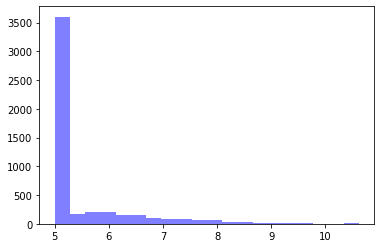

In [62]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 20
n, bins, patches = plt.hist(groundtruths, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [65]:
all = tn + fp + fn + tp
negative_weight = (tn + fp) / all
positive_weight = (fn + tp) / all
print(all, negative_weight, positive_weight)

5010 0.9181636726546906 0.08183632734530938


In [73]:
target = torch.tensor([1, 2, 2, 10])
th = 7
weight = ((target > th) + 0) * (negative_weight - positive_weight) + positive_weight
weight

tensor([0.0818, 0.0818, 0.0818, 0.9182])

In [74]:
def weighted_mse_loss(input, target):
  th = 7
  weight = ((target > th) + 0) * (negative_weight - positive_weight) + positive_weight
  return torch.sum(weight * (input - target) ** 2)

def run_weighted(model, n_epoch, verbose = True, dataset_name="davis"):
  model.to(device)
  optimizer = optim.Adam(model.parameters(), lr = 1e-3)
  loss_function = weighted_mse_loss

  for epoch in trange(1, n_epoch+1, desc='Epochs', leave=True):
    if verbose:
      print('\nEpoch %d:' % epoch)
    train(model, optimizer, data_loaders[dataset_name]["train"], loss_function)
    test(model, data_loaders[dataset_name]["validation"], loss_function) 

In [75]:
model = DeepDTAModified('davis', 128, 3, 1)
run_weighted(model, 30, "davis")


Epoch 1:


    Train [7424/20037]	 | 	Loss: 0.33609
    Train [15104/20037]	 | 	Loss: 0.27083

==> Train | Average loss: 4.9836
==> Validation | Average loss: 0.2627

Epoch 2:


    Train [7424/20037]	 | 	Loss: 0.37425
    Train [15104/20037]	 | 	Loss: 0.28227

==> Train | Average loss: 0.2568
==> Validation | Average loss: 0.2359

Epoch 3:


    Train [7424/20037]	 | 	Loss: 0.20384
    Train [15104/20037]	 | 	Loss: 0.21761

==> Train | Average loss: 0.2487
==> Validation | Average loss: 0.2319

Epoch 4:


    Train [7424/20037]	 | 	Loss: 0.23027
    Train [15104/20037]	 | 	Loss: 0.30562

==> Train | Average loss: 0.2446
==> Validation | Average loss: 0.2337

Epoch 5:


    Train [7424/20037]	 | 	Loss: 0.22131
    Train [15104/20037]	 | 	Loss: 0.24813

==> Train | Average loss: 0.2398
==> Validation | Average loss: 0.2278

Epoch 6:


    Train [7424/20037]	 | 	Loss: 0.17137
    Train [15104/20037]	 | 	Loss: 0.22544

==> Train | Average loss: 0.2315
==> Validation | Average loss: 0.2149

Epoch 7:


    Train [7424/20037]	 | 	Loss: 0.19759
    Train [15104/20037]	 | 	Loss: 0.17916

==> Train | Average loss: 0.2184
==> Validation | Average loss: 0.2101

Epoch 8:


    Train [7424/20037]	 | 	Loss: 0.19731
    Train [15104/20037]	 | 	Loss: 0.16946

==> Train | Average loss: 0.2091
==> Validation | Average loss: 0.2088

Epoch 9:


    Train [7424/20037]	 | 	Loss: 0.19586
    Train [15104/20037]	 | 	Loss: 0.27409

==> Train | Average loss: 0.2032
==> Validation | Average loss: 0.2120

Epoch 10:


    Train [7424/20037]	 | 	Loss: 0.30486
    Train [15104/20037]	 | 	Loss: 0.23505

==> Train | Average loss: 0.1961
==> Validation | Average loss: 0.2021

Epoch 11:


    Train [7424/20037]	 | 	Loss: 0.20466
    Train [15104/20037]	 | 	Loss: 0.26483

==> Train | Average loss: 0.1918
==> Validation | Average loss: 0.1839

Epoch 12:


    Train [7424/20037]	 | 	Loss: 0.12388
    Train [15104/20037]	 | 	Loss: 0.16394

==> Train | Average loss: 0.1839
==> Validation | Average loss: 0.1801

Epoch 13:


    Train [7424/20037]	 | 	Loss: 0.19623
    Train [15104/20037]	 | 	Loss: 0.16356

==> Train | Average loss: 0.1753
==> Validation | Average loss: 0.1778

Epoch 14:


    Train [7424/20037]	 | 	Loss: 0.12107
    Train [15104/20037]	 | 	Loss: 0.21130

==> Train | Average loss: 0.1723
==> Validation | Average loss: 0.1786

Epoch 15:


    Train [7424/20037]	 | 	Loss: 0.13510
    Train [15104/20037]	 | 	Loss: 0.16453

==> Train | Average loss: 0.1707
==> Validation | Average loss: 0.1695

Epoch 16:


    Train [7424/20037]	 | 	Loss: 0.15863
    Train [15104/20037]	 | 	Loss: 0.15543

==> Train | Average loss: 0.1668
==> Validation | Average loss: 0.1804

Epoch 17:


    Train [7424/20037]	 | 	Loss: 0.14030
    Train [15104/20037]	 | 	Loss: 0.16399

==> Train | Average loss: 0.1584
==> Validation | Average loss: 0.1636

Epoch 18:


    Train [7424/20037]	 | 	Loss: 0.13545
    Train [15104/20037]	 | 	Loss: 0.15348

==> Train | Average loss: 0.1564
==> Validation | Average loss: 0.1654

Epoch 19:


    Train [7424/20037]	 | 	Loss: 0.21533
    Train [15104/20037]	 | 	Loss: 0.10485

==> Train | Average loss: 0.1569
==> Validation | Average loss: 0.1733

Epoch 20:


    Train [7424/20037]	 | 	Loss: 0.14381
    Train [15104/20037]	 | 	Loss: 0.11585

==> Train | Average loss: 0.1509
==> Validation | Average loss: 0.1704

Epoch 21:


    Train [7424/20037]	 | 	Loss: 0.16568
    Train [15104/20037]	 | 	Loss: 0.14702

==> Train | Average loss: 0.1518
==> Validation | Average loss: 0.2276

Epoch 22:


    Train [7424/20037]	 | 	Loss: 0.15436
    Train [15104/20037]	 | 	Loss: 0.24640

==> Train | Average loss: 0.1578
==> Validation | Average loss: 0.1642

Epoch 23:


    Train [7424/20037]	 | 	Loss: 0.13174
    Train [15104/20037]	 | 	Loss: 0.13766

==> Train | Average loss: 0.1443
==> Validation | Average loss: 0.1641

Epoch 24:


    Train [7424/20037]	 | 	Loss: 0.11056
    Train [15104/20037]	 | 	Loss: 0.14214

==> Train | Average loss: 0.1414
==> Validation | Average loss: 0.1556

Epoch 25:


    Train [7424/20037]	 | 	Loss: 0.14844
    Train [15104/20037]	 | 	Loss: 0.08444

==> Train | Average loss: 0.1393
==> Validation | Average loss: 0.1515

Epoch 26:


    Train [7424/20037]	 | 	Loss: 0.13332
    Train [15104/20037]	 | 	Loss: 0.19204

==> Train | Average loss: 0.1367
==> Validation | Average loss: 0.1708

Epoch 27:


    Train [7424/20037]	 | 	Loss: 0.13832
    Train [15104/20037]	 | 	Loss: 0.18945

==> Train | Average loss: 0.1351
==> Validation | Average loss: 0.1576

Epoch 28:


    Train [7424/20037]	 | 	Loss: 0.12492
    Train [15104/20037]	 | 	Loss: 0.11127

==> Train | Average loss: 0.1321
==> Validation | Average loss: 0.1450

Epoch 29:


    Train [7424/20037]	 | 	Loss: 0.14451
    Train [15104/20037]	 | 	Loss: 0.08320

==> Train | Average loss: 0.1292
==> Validation | Average loss: 0.1442

Epoch 30:


    Train [7424/20037]	 | 	Loss: 0.16656
    Train [15104/20037]	 | 	Loss: 0.10420

==> Train | Average loss: 0.1288
==> Validation | Average loss: 0.1521



In [76]:
torch.save(model.state_dict(), 'model_davis_weighted.pt')

In [86]:
test(model, data_loaders["davis"]["test"], weighted_mse_loss, type="Test")  

==> Test | Average loss: 0.1704


In [87]:
results, groundtruths = predict(model, data_loaders["davis"]["test"])

In [88]:
calculate_concordence_index(results, groundtruths)

0.8040557273502922

In [89]:
binary_results, binary_groundtruths = threshold("davis", results, groundtruths)
np.sum(np.squeeze(binary_groundtruths))

410

In [90]:
from sklearn.metrics import  classification_report, confusion_matrix

tn, fp, fn, tp = confusion_matrix(np.squeeze(binary_groundtruths), np.squeeze(binary_results)).ravel()
tn, fp, fn, tp

(3919, 681, 95, 315)

In [91]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1 = 2 * tp / (2 * tp + fp + fn)
accuracy = (tp + tn) / (tn + fp + fn + tp)

print("F1 is:", f1)
print("Specificiy is : ", specificity)
print("Sensitivity is: ", sensitivity)
print("Accuracy is:", accuracy)

F1 is: 0.4480796586059744
Specificiy is :  0.8519565217391304
Sensitivity is:  0.7682926829268293
Accuracy is: 0.8451097804391218
